In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data = pd.read_csv("/content/car data.csv")

In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
car_data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [13]:
# Label Encoding

car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2},
                  'Seller_Type':{'Dealer':0, 'Individual':1},
                  'Transmission':{'Manual':0,'Automatic':1}}, inplace = True)

In [14]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
# Splitting the data

X = car_data.drop(columns = ['Selling_Price', 'Car_Name'], axis=1)
Y = car_data['Selling_Price']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [17]:
linear_model = LinearRegression()
lasso_model = Lasso()

In [18]:
linear_model.fit(X_train,Y_train)
lasso_model.fit(X_train,Y_train)

Lasso()

Linear Regression

In [21]:
predict_linear_train = linear_model.predict(X_train)
linear_rmse_train = metrics.r2_score(predict_linear_train, Y_train)
linear_rmse_train

0.8685439505823428

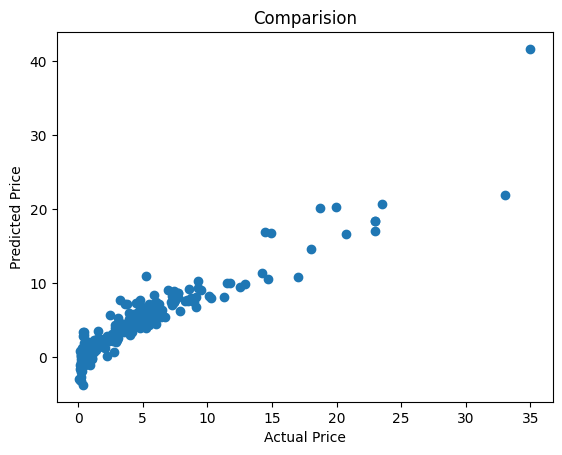

In [24]:
plt.scatter(Y_train, predict_linear_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparision')
plt.show()

In [22]:
predict_linear_test = linear_model.predict(X_test)
linear_rmse_test = metrics.r2_score(predict_linear_test, Y_test)
linear_rmse_test

0.8193296211105912

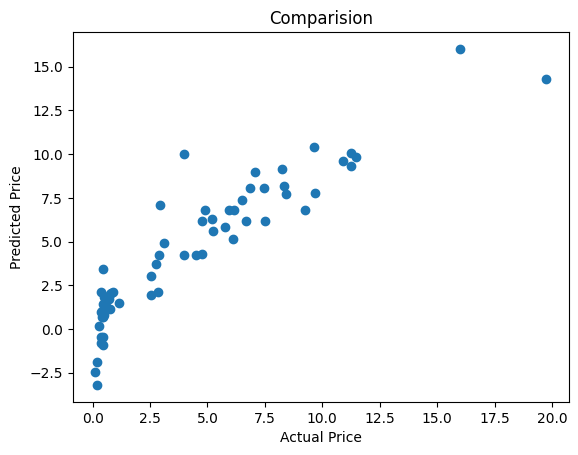

In [23]:
plt.scatter(Y_test, predict_linear_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparision')
plt.show()

Lasso Regression

In [26]:
predict_lasso_train = lasso_model.predict(X_train)
lasso_rmse_train = metrics.r2_score(predict_lasso_train, Y_train)
lasso_rmse_train

0.7999397993548054

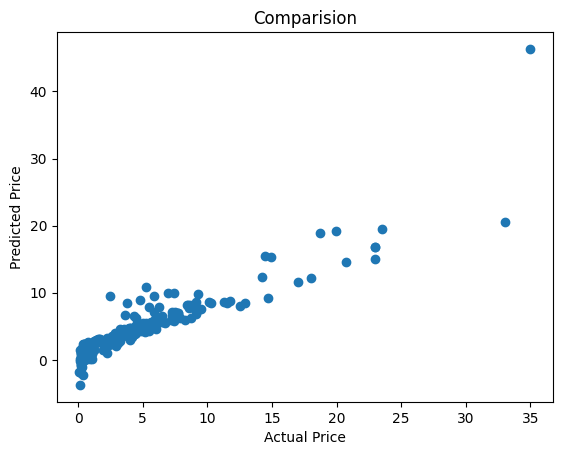

In [27]:
plt.scatter(Y_train, predict_lasso_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparision')
plt.show()

In [28]:
predict_lasso_test = lasso_model.predict(X_test)
lasso_rmse_test = metrics.r2_score(predict_lasso_test, Y_test)
lasso_rmse_test

0.7717678246278714

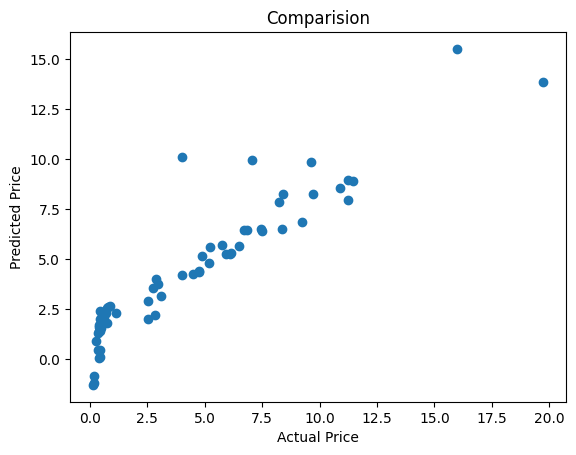

In [29]:
plt.scatter(Y_test, predict_lasso_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparision')
plt.show()